
Reading Intan Technologies RHS Data File, Version 3.3

Found 16 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.1 seconds
Filtering Data...
Filtering Done!


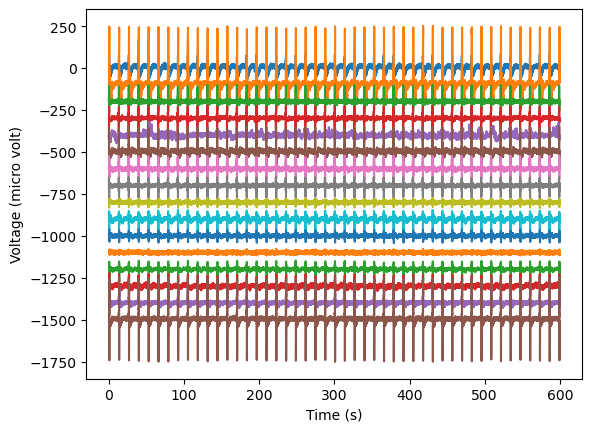

In [ ]:
import sys
sys.path.append('E:\\Desktop\\omipolar\\DataPlotting')
import organoidContour as oc
from organoidContour import data
from organoidContour import preprocessing
sys.path.append('E:\\Desktop\\omipolar\\DataPlotting\\load_intan_rhs_format')
import load_intan_rhs_format as ld
import numpy as np
%matplotlib inline
sampling_rate = 10000
use_raw_data = 0
cutoff_frequency = 1000


data_path = "E:\Desktop\omipolar\DataPlotting\JKCO\E-4031 test_2024-05-20\JK CO4 folded 1_240520_135929\JK CO4 folded 1_240520_141029.rhs"
wanted_channel = list(range(16))

#processed_data = preprocessing.processingPipline(data_paths['data_1'], data_paths['data_2'])
processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate, one_address= 1)
#raw_data = preprocessing.extract_raw_data(data_path, data_path)
available_data = processed_data#[wanted_channel]

target_indeces = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

intan_chennels = [0,1,2,3,4,5,6,7,24,25,26,27,28,29,30,31]

target_data = available_data[target_indeces]
target_data_copy = target_data.copy()
preprocessing.plotWaves(available_data, 
            target_indeces, start= 00000, sample= 600000, interval = 100)

In [ ]:


%matplotlib inline
sampling_rate = 10000
use_raw_data = 0
cutoff_frequency = 1000

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

%matplotlib inline
# Add necessary paths
sys.path.append(os.path.abspath("../"))
from electrophysiology_mapping import preprocessing

BASELINE_PATH = "E:\Desktop\omipolar\DataPlotting\JKCO\JKCO6\DrugData\isoser\JK CO6 in medi after Ca imaging iso sero_240529_133200\JK CO6 in medi after Ca imaging iso sero_240529_133500.rhs"
DRUG_PATH =     "E:\Desktop\omipolar\DataPlotting\JKCO\JKCO6\DrugData\isoser\JK CO6 in medi after Ca imaging iso sero_240529_133200\JK CO6 in medi after Ca imaging iso sero_240529_135500.rhs"
#Channel information
condition_drug = 'E4031JKCO6'
save_dir = 'results\\E4031JKCO6'


TARGET_INDICES = [0, 1, 2, 3,4, 8,  9,  10, 11, 12, 13, 14, 15]
INTAN_CHANNELS = [0, 1, 2, 3,4, 24, 25, 26, 27, 28, 29, 30, 31]


CUSTOM_SETTINGS = {
    'Baseline': {
        0: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        1: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 2},
        2: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        3: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 3},
        4: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        5: {'fpd_window': (40, 200), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        6: {'fpd_window': (40, 150), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        7: {'fpd_window': (40, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 3},
        24: {'fpd_window': (150, 250), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        25: {'fpd_window': (150, 350), 'find_max': False, 'detect_above': True, 'threshold_factor': 2},
        26: {'fpd_window': (150, 350), 'find_max': False, 'detect_above': True, 'threshold_factor': 3},
        27: {'fpd_window': (150, 350), 'find_max': False,'detect_above': True, 'threshold_factor': 4},
        28: {'fpd_window': (150, 350), 'find_max': False, 'detect_above': True, 'threshold_factor': 3},
        29: {'fpd_window': (150, 350), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        30: {'fpd_window': (140, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        31: {'fpd_window': (150, 350), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
    },
    'Drug': {
        0: {'fpd_window': (100, 300), 'find_max': True, 'detect_above': True, 'threshold_factor': 3},
        1: {'fpd_window': (150, 450), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        2: {'fpd_window': (150,250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        3: {'fpd_window': (150,250), 'find_max': True, 'detect_above': True, 'threshold_factor': 3},
        4: {'fpd_window': (150,250), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        5: {'fpd_window': (150,350), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        6: {'fpd_window': (40, 150), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        7: {'fpd_window': (40, 150), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
        24: {'fpd_window': (70, 250), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        25: {'fpd_window': (250, 450), 'find_max': False, 'detect_above': True, 'threshold_factor': 3},
        26: {'fpd_window': (250, 450), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        27: {'fpd_window': (150,300), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        28: {'fpd_window': (100, 400), 'find_max': False, 'detect_above': True, 'threshold_factor': 3},
        29: {'fpd_window': (200,500), 'find_max': False, 'detect_above': True, 'threshold_factor': 4},
        30: {'fpd_window': (150, 250), 'find_max': True, 'detect_above': True, 'threshold_factor': 3},
        31: {'fpd_window': (150, 500), 'find_max': True, 'detect_above': True, 'threshold_factor': 4},
    }
}

def load_and_process_data(data_path, cutoff=CUTOFF_FREQUENCY, fs_new=SAMPLING_RATE):
    """Load and process data using the preprocessing pipeline."""
    processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff, fs_new=fs_new, one_address=1)
    if USE_RAW_DATA:
        raw_data = preprocessing.extract_raw_data(data_path, data_path)
        return raw_data[TARGET_INDICES], 30000
    return processed_data[TARGET_INDICES], fs_new

def detect_spikes(data, fs, threshold_factor=4, min_distance=1, detect_above=True):
    """
    Detect spikes in the data.
    
    Args:
    data (numpy.array): The input signal data.
    fs (float): Sampling frequency of the data.
    threshold_factor (float): Factor to multiply the standard deviation for threshold calculation.
    min_distance (float): Minimum distance between peaks in seconds.
    detect_above (bool): If True, detect peaks above the threshold. If False, detect peaks below the threshold.
    
    Returns:
    numpy.array: Indices of detected spikes.
    """
    mean = np.mean(data)
    std = np.std(data)
    threshold = mean + threshold_factor * std if detect_above else mean - threshold_factor * std
    
    if detect_above:
        spikes, _ = find_peaks(data, height=threshold, distance=int(min_distance * fs))
    else:
        spikes, _ = find_peaks(-data, height=-threshold, distance=int(min_distance * fs))
    
    return spikes

def find_lat(data, peak_index, fs, window_ms=(-1, 20)):
    """Find the local activation time (LAT) for a spike."""
    start_samples = int(window_ms[0] * fs / 1000)
    end_samples = int(window_ms[1] * fs / 1000)
    start_index = max(0, peak_index + start_samples)
    end_index = min(len(data), peak_index + end_samples)
    window = data[start_index:end_index]
    slopes = np.diff(window)
    lat_relative_index = np.argmin(slopes)
    return start_index + lat_relative_index

def analyze_spikes(data, spikes, fs, fpd_window, find_max):
    """Analyze detected spikes for various parameters."""
    results = []
    for i, spike in enumerate(spikes):
        start = max(0, spike - int(0.5 * fs))
        end = min(len(data), spike + int(0.5 * fs))
        segment = data[start:end]
        amplitude = np.max(segment) - np.min(segment)
        amp_peak = start + np.argmax(segment)
        amp_trough = start + np.argmin(segment)
        
        isi = (spike - spikes[i-1]) / fs * 1000 if i > 0 else None
        lat = find_lat(data, spike, fs)
        
        fpd_start = lat
        fpd_end_start = fpd_start + int(fpd_window[0] * fs / 1000)
        fpd_end_end = min(len(data), fpd_start + int(fpd_window[1] * fs / 1000))
        fpd_segment = data[fpd_end_start:fpd_end_end]
        if len(fpd_segment) > 0:
            fpd_end = fpd_end_start + (np.argmax(fpd_segment) if find_max else np.argmin(fpd_segment))
            fpd = (fpd_end - fpd_start) / fs * 1000  # in ms
        else:
            fpd = None
            fpd_end = None
        
        results.append({
            'spike_index': spike,
            'lat': lat,
            'amplitude': amplitude,
            'amp_peak': amp_peak,
            'amp_trough': amp_trough,
            'isi': isi,
            'fpd': fpd,
            'fpd_end': fpd_end
        })
    
    return results

def visualize_spike_detection(data, spikes, fs, intan_channel, condition, save_dir, detect_above, threshold_factor):
    """Visualize the signal data with detected spikes and threshold."""
    time = np.arange(len(data)) / fs
    mean = np.mean(data)
    std = np.std(data)
    threshold = mean + threshold_factor * std if detect_above else mean - threshold_factor * std
    
    plt.figure(figsize=(15, 6))
    plt.plot(time, data, label='Signal')
    plt.plot(time[spikes], data[spikes], 'ro', label='Detected Spikes')
    plt.axhline(y=threshold, color='g', linestyle='--', label='Threshold')
    
    plt.title(f'{condition} - Intan Channel {intan_channel}\nDetect {"Above" if detect_above else "Below"} Threshold')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (µV)')
    plt.legend()
    
    plt.grid(True)
    plt.tight_layout()
    
    # Save the figure
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'{condition}_intan_channel_{intan_channel}_spike_detection.png'))
    plt.close()

def visualize_spike_details(data, spike_info, fs, intan_channel, condition, save_dir, fpd_window, find_max):
    """Visualize details of a single spike."""
    spike = spike_info['spike_index']
    start = max(0, spike - int(0.05 * fs))
    end = min(len(data), spike + int(0.5 * fs))
    segment = data[start:end]
    time = np.arange(len(segment)) / fs * 1000
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time, segment)
    
    # Mark amplitude
    amp_start_time = time[spike_info['amp_peak'] - start]
    amp_start_value = segment[spike_info['amp_peak'] - start]
    amp_end_value = segment[spike_info['amp_trough'] - start]
    
    ax.annotate('', xy=(amp_start_time, amp_end_value), 
                xytext=(amp_start_time, amp_start_value),
                arrowprops=dict(arrowstyle='<->', color='r'))
    ax.text(amp_start_time, amp_start_value, 
            f'Amp: {spike_info["amplitude"]:.2f}', 
            verticalalignment='bottom', horizontalalignment='left', color='r')
    
    # Mark LAT
    lat_time = time[spike_info['lat'] - start]
    lat_value = segment[spike_info['lat'] - start]
    ax.plot(lat_time, lat_value, 'go', label='LAT')
    
    # Mark FPD
    if spike_info['fpd'] is not None:
        fpd_start_time = lat_time
        fpd_end_time = time[spike_info['fpd_end']-start]
        fpd_y_position = np.min(segment)
        ax.annotate('', xy=(fpd_end_time, fpd_y_position), 
                    xytext=(fpd_start_time, fpd_y_position),
                    arrowprops=dict(arrowstyle='<->', color='g'))
        ax.text((fpd_start_time + fpd_end_time) / 2, fpd_y_position, 
                f'FPD: {spike_info["fpd"]:.2f} ms', 
                verticalalignment='bottom', horizontalalignment='center', color='g')
    
    ax.set_title(f'{condition} - Intan Channel {intan_channel} - Spike at {spike/fs:.3f}s\n'
                 f'FPD Window: {fpd_window}, Find Max: {find_max}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Amplitude (µV)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, f'{condition}_intan_channel_{intan_channel}_spike_{spike}.png'))
    plt.close()

def non_linear_energy_operator(data):
    """
    Apply the Non-Linear Energy Operator (NEO) to the input signal.
    
    Args:
    data (numpy.array): The input signal data.
    
    Returns:
    numpy.array: The NEO-processed signal.
    """
    neo = np.zeros_like(data)
    for i in range(1, len(data) - 1):
        neo[i] = data[i]**2 - data[i-1] * data[i+1]
    return neo

def process_and_visualize_detailed(data, fs, condition, save_dir, custom_settings, min_distance = 1, use_neo=False):
    """Process data, detect spikes, analyze, and visualize results."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    all_results = []
    
    for i, channel_data in enumerate(data):
        intan_channel = INTAN_CHANNELS[i]
        channel_settings = custom_settings[intan_channel]
        fpd_window = channel_settings['fpd_window']
        find_max = channel_settings['find_max']
        detect_above = channel_settings['detect_above']
        threshold_factor = channel_settings['threshold_factor']
        
        if(use_neo):
            neo_data = non_linear_energy_operator(channel_data)
            spikes = detect_spikes(neo_data, fs, threshold_factor=threshold_factor, 
                               detect_above=detect_above, min_distance= min_distance)
            visualize_spike_detection(neo_data, spikes, fs, intan_channel, condition,
                                  os.path.join(save_dir, 'spike_detection_plots_neo'),
                                  detect_above, threshold_factor)
            spike_analysis = analyze_spikes(channel_data, spikes, fs, fpd_window, find_max)
        else:
            spikes = detect_spikes(channel_data, fs, threshold_factor=threshold_factor, 
                                detect_above=detect_above, min_distance= min_distance)
            spike_analysis = analyze_spikes(channel_data, spikes, fs, fpd_window, find_max)
        
        print(f"Condition: {condition}, Intan Channel: {intan_channel}")
        print(f"Number of spikes detected: {len(spikes)}")
        print(f"FPD Window: {fpd_window}, Find Max: {find_max}")
        print(f"Detect Above: {detect_above}, Threshold Factor: {threshold_factor}")
        
        # Visualize spike detection results
        visualize_spike_detection(channel_data, spikes, fs, intan_channel, condition,
                                  os.path.join(save_dir, 'spike_detection_plots'),
                                  detect_above, threshold_factor)

        
        # Visualize details for the first 3 spikes (or fewer if less than 3 spikes)
        for j, spike_info in enumerate(spike_analysis[:3]):
            visualize_spike_details(channel_data, spike_info, fs, intan_channel, condition, 
                                    os.path.join(save_dir, 'spike_details_plots'),
                                    fpd_window, find_max)
        
        # Prepare results for saving
        for spike in spike_analysis:
            all_results.append({
                'Condition': condition,
                'Intan_Channel': intan_channel,
                'Spike_Time': spike['spike_index'] / fs,
                'Amplitude': spike['amplitude'],
                'ISI': spike['isi'],
                'FPD': spike['fpd'],
                'FPD_Window': str(fpd_window),
                'Find_Max': find_max,
                'Detect_Above': detect_above,
                'Threshold_Factor': threshold_factor
            })
        
        # Print summary statistics
        amplitudes = [spike['amplitude'] for spike in spike_analysis]
        isis = [spike['isi'] for spike in spike_analysis if spike['isi'] is not None]
        fpds = [spike['fpd'] for spike in spike_analysis if spike['fpd'] is not None]
        
        print(f"Average Amplitude: {np.mean(amplitudes):.2f} µV")
        print(f"Average ISI: {np.mean(isis):.2f} ms")
        print(f"Average FPD: {np.mean(fpds):.2f} ms")
        print("\n")
    
    return all_results

def main():

    
    # Process baseline data
    baseline_data, fs = load_and_process_data(BASELINE_PATH)
    baseline_data = baseline_data[:,:]
    
    baseline_results = process_and_visualize_detailed(baseline_data, 
                fs, '0Baseline', save_dir, CUSTOM_SETTINGS['Baseline'], min_distance= 0.9)
    
    # Process drug data
    drug_data, fs = load_and_process_data(DRUG_PATH)
    if 0:
        zero_array = np.zeros((1, 600021))
        drug_data = np.insert(drug_data, 4, zero_array, axis=0)

        # Insert another zero array after the 5th row (which is now the 6th row due to the previous insertion)
        drug_data = np.insert(drug_data, 6, zero_array, axis=0)
        drug_data = drug_data[16:,:]
    drug_data = drug_data[:,3000:]
    drug_results = process_and_visualize_detailed(drug_data, fs, condition_drug, 
            save_dir, CUSTOM_SETTINGS['Drug'],min_distance= 1)
    
    # Combine results and save to CSV
    all_results = baseline_results + drug_results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(os.path.join(save_dir, 'spike_analysis_results.csv'), index=False)
    print(f"Results saved to {os.path.join(save_dir, 'spike_analysis_results.csv')}")

    # Optional: Perform additional analysis or comparisons between baseline and drug conditions
    baseline_df = pd.DataFrame(baseline_results)
    drug_df = pd.DataFrame(drug_results)

    # Example: Compare average FPD between baseline and drug conditions for each channel
    for channel in INTAN_CHANNELS:
        baseline_fpd = baseline_df[baseline_df['Intan_Channel'] == channel]['FPD'].mean()
        drug_fpd = drug_df[drug_df['Intan_Channel'] == channel]['FPD'].mean()
        
        print(f"Channel {channel}:")
        print(f"  Baseline average FPD: {baseline_fpd:.2f} ms")
        print(f"  {condition_drug} average FPD: {drug_fpd:.2f} ms")
        print(f"  FPD change: {drug_fpd - baseline_fpd:.2f} ms")
        print()

if __name__ == "__main__":
    main()


Reading Intan Technologies RHS Data File, Version 3.3

Found 16 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.0 seconds
Filtering Data...
Filtering Done!
Condition: 0Baseline, Intan Channel: 0
Number of spikes detected: 37
FPD Window: (150, 250), Find Max: True
Detect Above: True, Threshold Factor: 4
Average Amplitude: 145.87 µV
Average ISI: 1611.35 ms
Average FPD: 180.42 ms


Condition: 0Baseline, Intan Channel: 1
Number of spikes detected: 37
FPD Window: (150, 250), Find Max: True
Detect Above: True, Threshold Facto